In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Thailand_Toothpaste_Nationwide.csv")

In [3]:
df.columns

Index(['Date', 'Vol_Nationwide', 'P_Nationwide', 'Population', 'CCPI',
       'Tourists', 'HDI', 'CCI', 'R_GDP', 'R_Export_Goods_and_Services',
       'Employment', 'R_Agri_Prod', ' Paddy_Price_Index', ' Paddy_Prod_Index'],
      dtype='object')

# parsing quarterly date col

In [4]:
    def parse_quarter(x):
        '''
        parse_quarter allows parsing string into quarterly dates from string including "Q1 2020",
        "Q22020","2020 Q3", "2021Q1","2020-Q2","Q2-2021" to "Q2-2021"
        '''
        x = x.upper()
        if x[0].upper()=='Q' and len(x)==7:
             return "-".join(x.split())
        elif '-' in x:
            dts = x.split('-')
            if dts[0][0]=='Q':
                return x
            else:
                return "-".join(dts[::-1])
        else:
            if len(x)==7:
                return "-".join(x.split()[::-1])
            elif len(x)==6 and x[0]=='Q':
                 return "-".join([x[:2],x[3:]])
            else:
                return "-".join([x[4:],x[:4]])

In [5]:
df.head()

,Date,Vol_Nationwide,P_Nationwide,Population,CCPI,Tourists,HDI,CCI,R_GDP,R_Export_Goods_and_Services,Employment,R_Agri_Prod,Paddy_Price_Index,Paddy_Prod_Index
0,2009Q1,3702605.2,405.4,63.309476,91.34625,3452531,0.718,NaN,1907673,1239626,36479.7,153185,149.9,109.5
1,2009Q2,3839972.7,408.7,63.389464,91.32875,3493469,0.718,NaN,1836030,1188219,37644.1,149084,149.3,108.9
2,2009Q3,3807564.7,418.7,63.469452,91.39125,3557969,0.718,NaN,1874133,1399868,38295.7,154093,145.4,110.7
3,2009Q4,3828559.6,414.8,63.530000,91.53375,3646031,0.718,NaN,2039253,1485185,38175.4,149758,154.7,109.2
4,2010Q1,3723743.2,426.2,63.617500,91.75625,3757656,0.719,NaN,2139668,1456951,37415.6,149601,157.8,86.4


# converting date col to datetime format to be used as index

In [6]:
df['period'] = df.Date.apply(parse_quarter)

In [7]:
df.head()

,Date,Vol_Nationwide,P_Nationwide,Population,CCPI,Tourists,HDI,CCI,R_GDP,R_Export_Goods_and_Services,Employment,R_Agri_Prod,Paddy_Price_Index,Paddy_Prod_Index,period
0,2009Q1,3702605.2,405.4,63.309476,91.34625,3452531,0.718,NaN,1907673,1239626,36479.7,153185,149.9,109.5,Q1-2009
1,2009Q2,3839972.7,408.7,63.389464,91.32875,3493469,0.718,NaN,1836030,1188219,37644.1,149084,149.3,108.9,Q2-2009
2,2009Q3,3807564.7,418.7,63.469452,91.39125,3557969,0.718,NaN,1874133,1399868,38295.7,154093,145.4,110.7,Q3-2009
3,2009Q4,3828559.6,414.8,63.530000,91.53375,3646031,0.718,NaN,2039253,1485185,38175.4,149758,154.7,109.2,Q4-2009
4,2010Q1,3723743.2,426.2,63.617500,91.75625,3757656,0.719,NaN,2139668,1456951,37415.6,149601,157.8,86.4,Q1-2010


In [8]:
df['period'] = pd.to_datetime(['-'.join(x.split('-')[::-1]) for x in df['period']])

In [9]:
df[['Date','period']].head()

,Date,period
0,2009Q1,2009-01-01
1,2009Q2,2009-04-01
2,2009Q3,2009-07-01
3,2009Q4,2009-10-01
4,2010Q1,2010-01-01


# check to confirm there is no missing values

In [10]:
sum(df['Vol_Nationwide'].isna())

0

In [11]:
sum(df['period'].isna())

0

In [12]:
df.set_index('period',inplace=True)

<AxesSubplot:xlabel='period'>

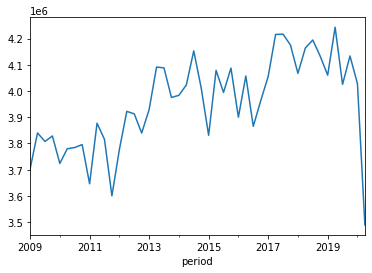

In [13]:
df.Vol_Nationwide.plot()

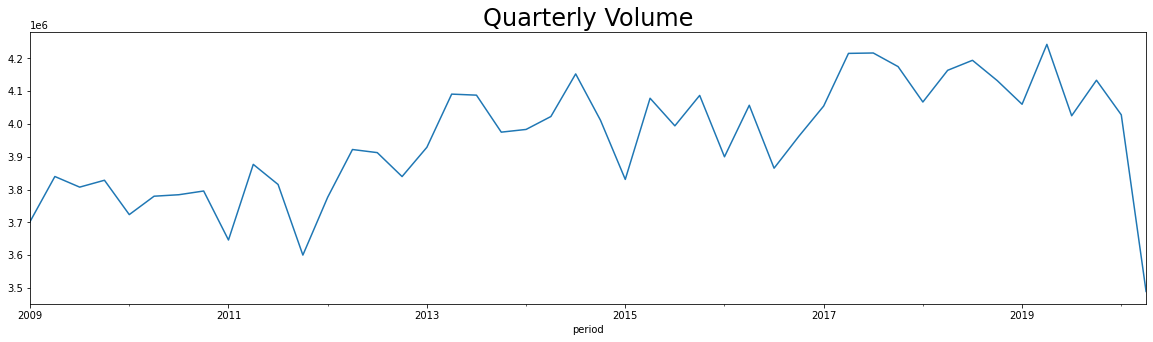

In [14]:
plt.title("Quarterly Volume",size=24)
df.Vol_Nationwide.plot(figsize=(20,5))
plt.show()

In [15]:
data = df.Vol_Nationwide

# ACF and PACF

In [16]:
import statsmodels.graphics.tsaplots as sgt

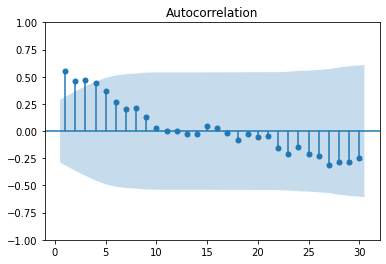

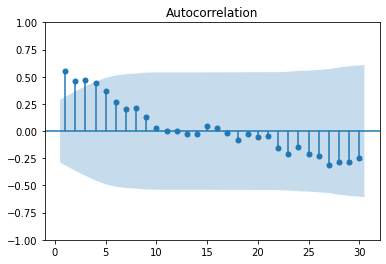

In [17]:
sgt.plot_acf(data,lags=30,zero=False)

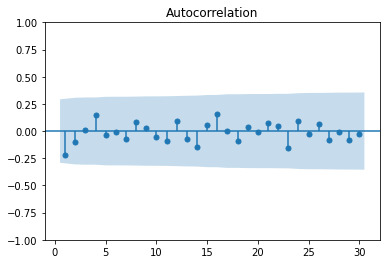

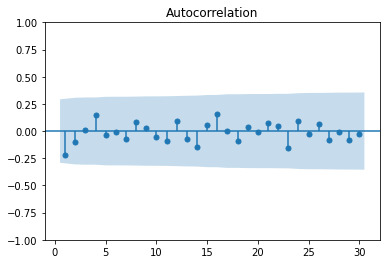

In [18]:
sgt.plot_acf(data.diff().dropna(),lags=30,zero=False)

# acf of 1st order difference suggests q=0

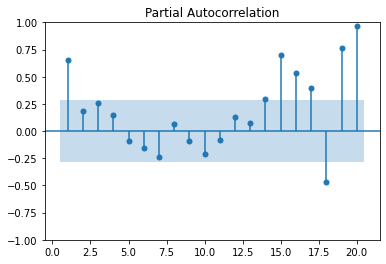

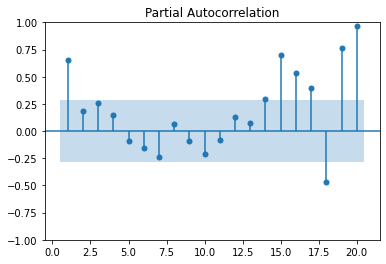

In [19]:
sgt.plot_pacf(data,lags=20,zero=False,method=('ols'))

In [20]:
from statsmodels.tsa.stattools import acf, pacf
pacf_summary = pacf(data,nlags=20,method=('ols'))

In [21]:
pacf_summary

array([ 1.        ,  0.65015273,  0.18788532,  0.25618347,  0.14605115,
       -0.08730543, -0.1534466 , -0.23477629,  0.0656456 , -0.08903366,
       -0.21352703, -0.08136822,  0.12788872,  0.07164099,  0.29806841,
        0.7008674 ,  0.53571255,  0.39434809, -0.46839396,  0.76664769,
        0.96735626])

In [22]:
cc = pacf_summary[1:10]

In [23]:
cc

array([ 0.65015273,  0.18788532,  0.25618347,  0.14605115, -0.08730543,
       -0.1534466 , -0.23477629,  0.0656456 , -0.08903366])

In [24]:
occurrences_more_than_p3 = cc > .3

In [25]:
count = occurrences_more_than_p3.sum()

In [26]:
count

1

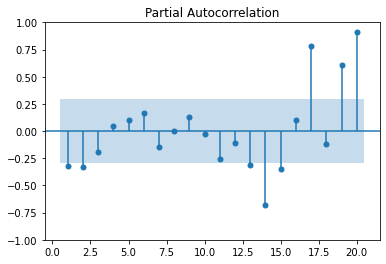

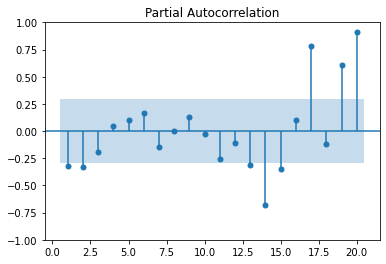

In [27]:
sgt.plot_pacf(data.diff().dropna(),lags=20,zero=False,method=('ols'))

In [28]:
from statsmodels.tsa.stattools import acf, pacf
pacf_summary = pacf(data.diff().dropna(),nlags=20,method=('ols'))

In [29]:
pacf_summary

array([ 1.        , -0.31665335, -0.33284066, -0.19444829,  0.04390566,
        0.10078979,  0.16579268, -0.14971165,  0.00347988,  0.12697998,
       -0.0277603 , -0.25522234, -0.11284118, -0.31537272, -0.68074266,
       -0.35090477,  0.10438888,  0.77815969, -0.11717662,  0.61144819,
        0.91083946])

In [30]:
cc = pacf_summary

In [31]:
cc

array([ 1.        , -0.31665335, -0.33284066, -0.19444829,  0.04390566,
        0.10078979,  0.16579268, -0.14971165,  0.00347988,  0.12697998,
       -0.0277603 , -0.25522234, -0.11284118, -0.31537272, -0.68074266,
       -0.35090477,  0.10438888,  0.77815969, -0.11717662,  0.61144819,
        0.91083946])

In [32]:
occurrences_more_than_p3 = abs(cc[1:10]) > .3

In [33]:
count = occurrences_more_than_p3.sum()

In [34]:
count

2

# pacf of 1st order difference suggests AR a value of 2 ie p = 2

need to check why the charts are not being as expected

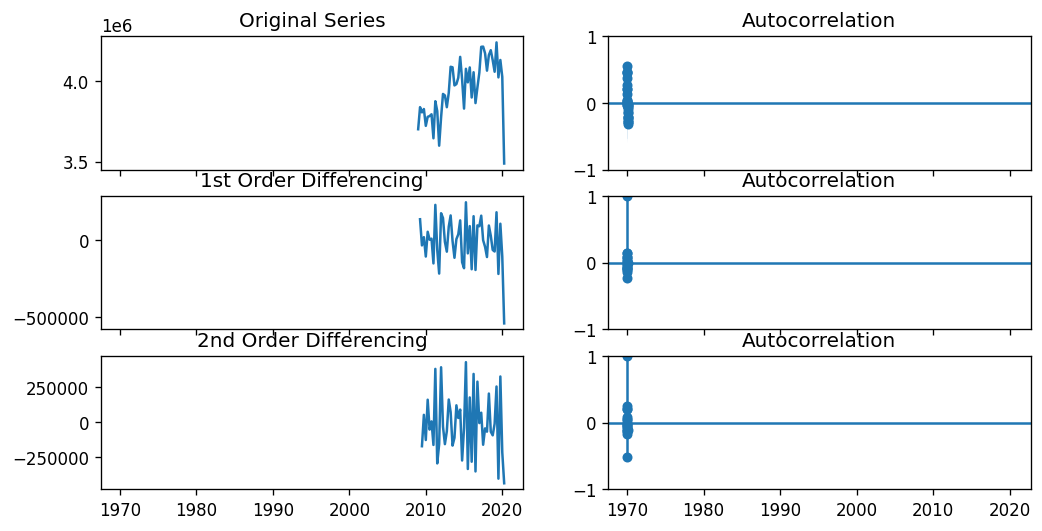

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data); axes[0, 0].set_title('Original Series')
plot_acf(data, lags=30,zero=False,ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

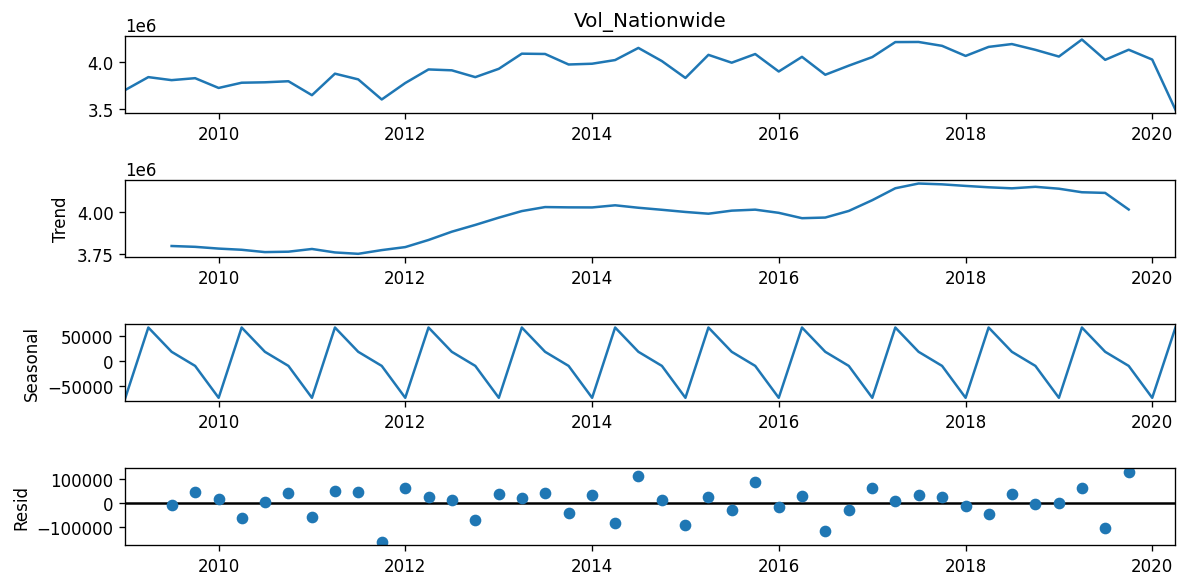

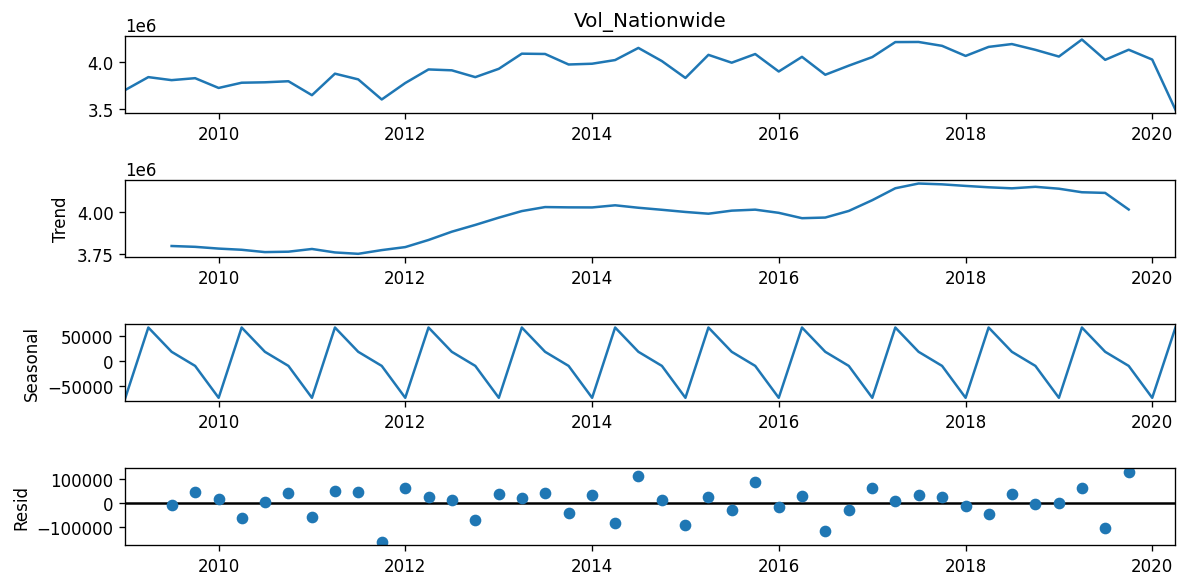

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot()


<AxesSubplot:xlabel='period'>

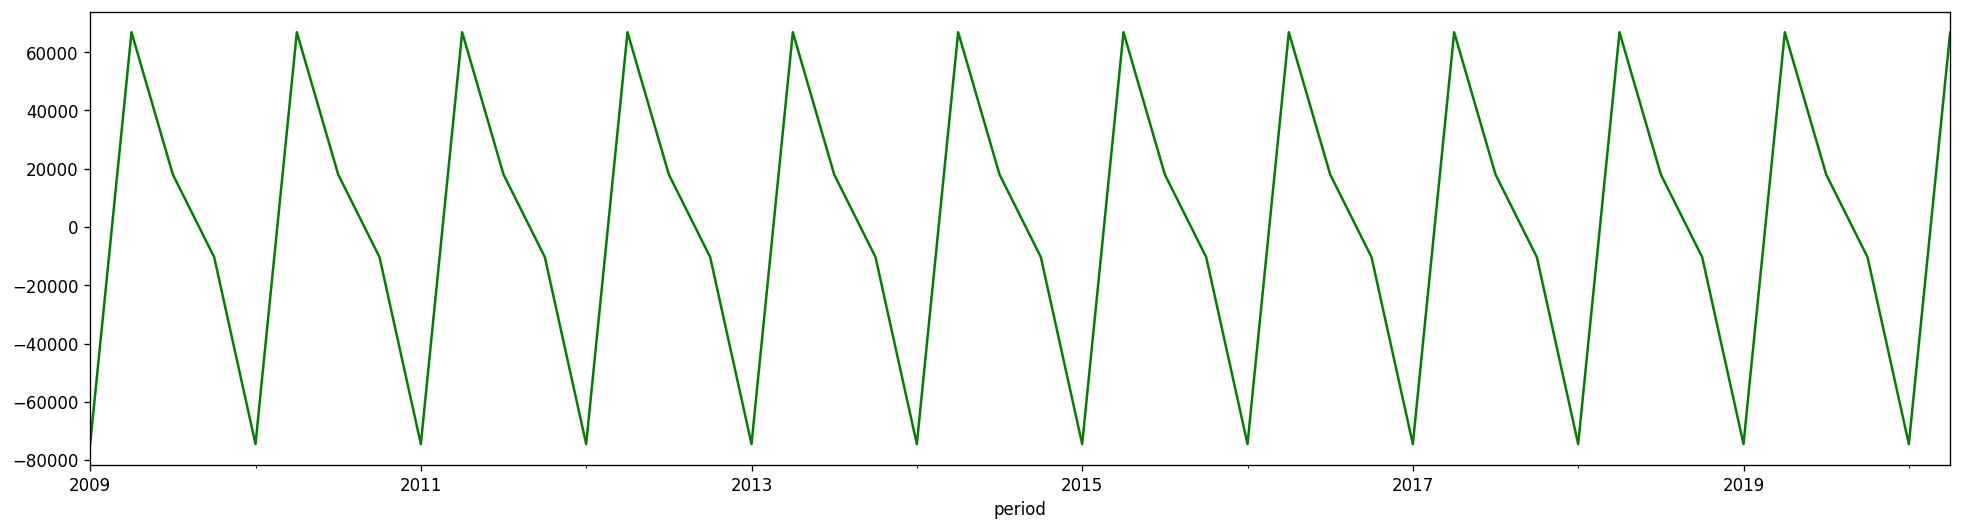

In [37]:
seasonality=decompose_data.seasonal
seasonality.plot(figsize=(20,5),color='green')

Text(0.5, 1.0, 'Trend')

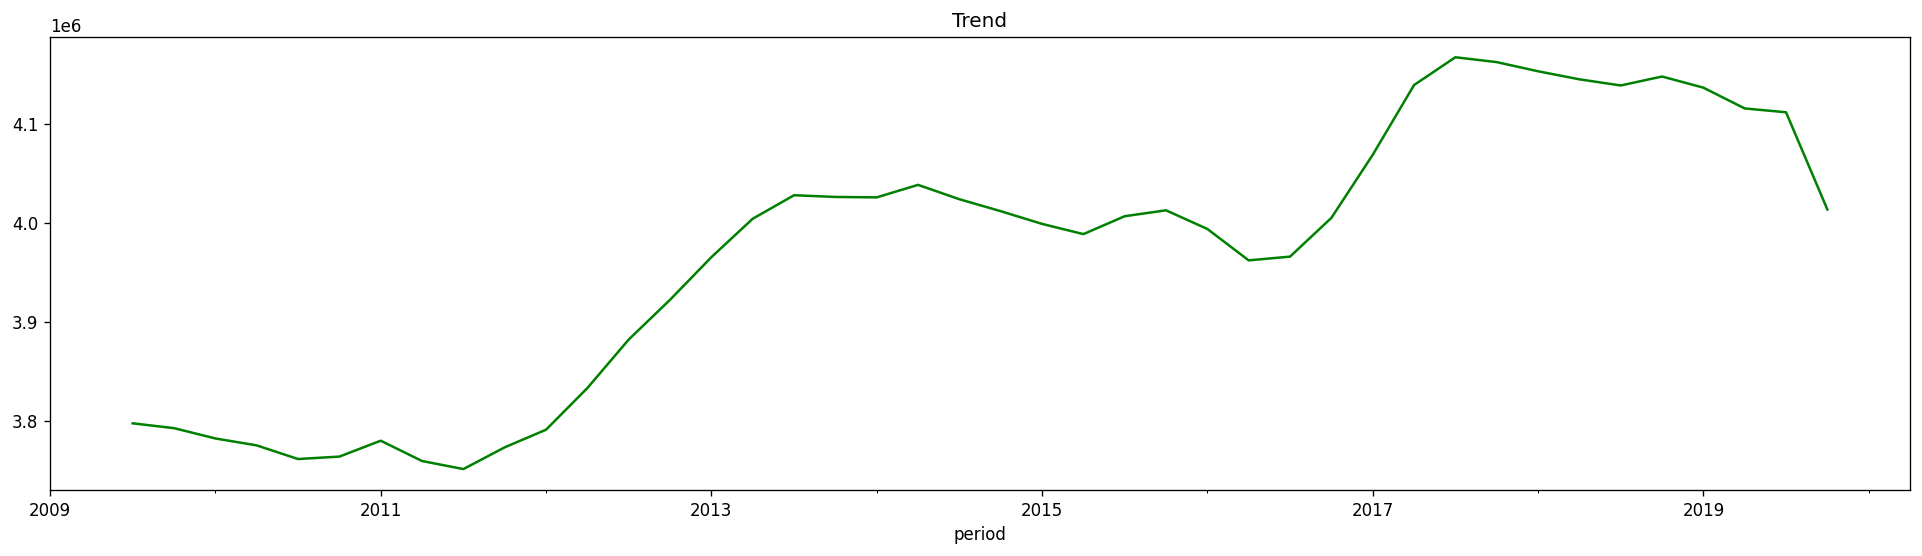

In [38]:
trend = decompose_data.trend
trend.plot(figsize=(20,5),color='green')
plt.title('Trend')

Text(0.5, 1.0, 'Residuals')

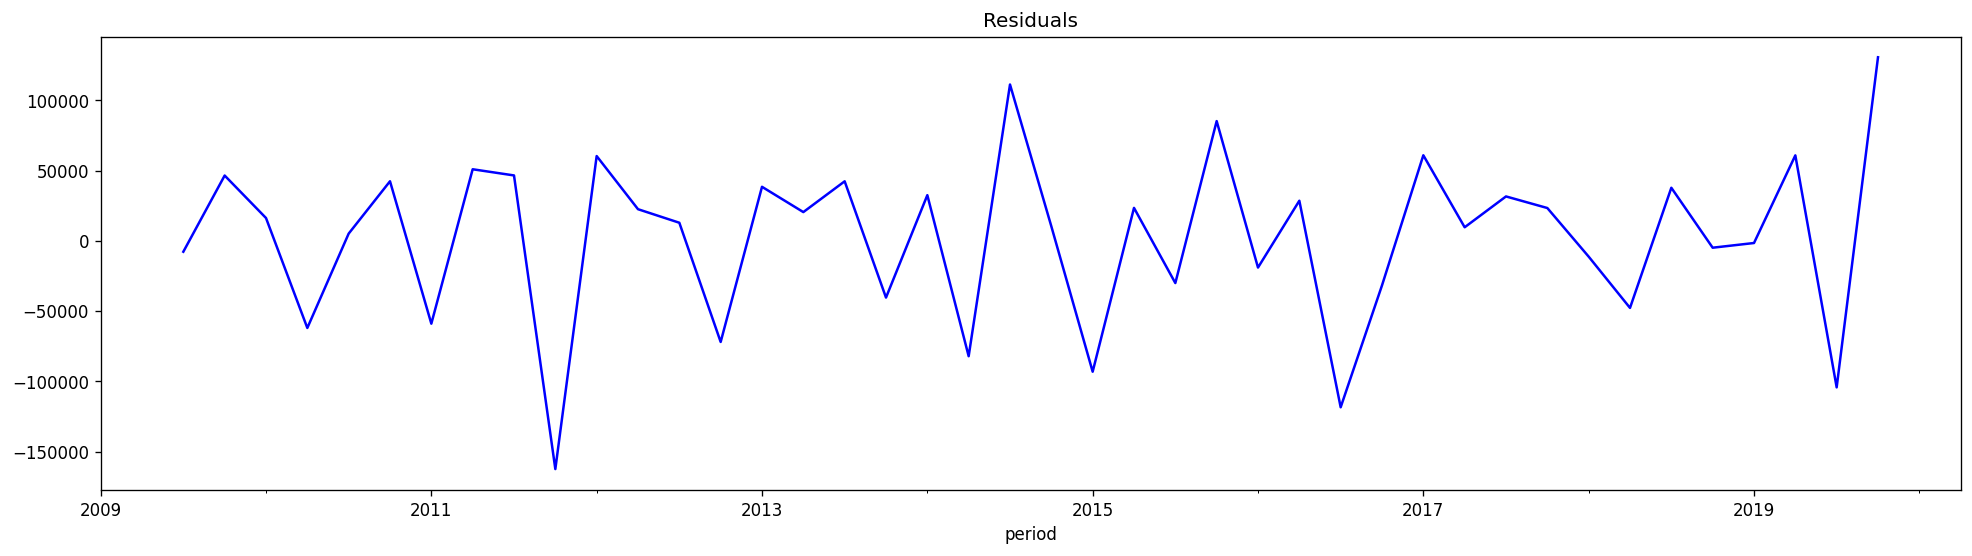

In [39]:
residuals = decompose_data.resid
residuals.plot(figsize=(20,5),color='blue')
plt.title('Residuals')

# test for checking if the data is stationary

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
dftest = adfuller(data, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -2.7226531670789207
2. P-Value :  0.07019964248754136
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 45
5. Critical Values :
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937


# ARIMA model

In [44]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# 2,0,0 ARIMA Model
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Vol_Nationwide   No. Observations:                   46
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -609.844
Date:                Wed, 23 Mar 2022   AIC                           1225.687
Time:                        09:58:57   BIC                           1231.173
Sample:                    01-01-2009   HQIC                          1227.742
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.954e+06   5.55e+04     71.281      0.000    3.85e+06    4.06e+06
ar.L1          0.6665      0.163      4.081      0.000       0.346       0.987
sigma2      1.856e+10      0.599    3.1e+10      0.0

d:\techlabs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
d:\techlabs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
d:\techlabs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [50]:
model_fit.resid

period
2009-01-01   -251427.276084
2009-04-01     53524.430622
2009-07-01    -70443.339158
2009-10-01    -27847.485373
2010-01-01   -146657.648167
2010-04-01    -20686.012833
2010-07-01    -53538.197157
2010-10-01    -45216.149527
2011-01-01   -202248.048789
2011-04-01    128088.719427
2011-07-01    -87030.969133
2011-10-01   -261515.392094
2012-01-01     58429.436485
2012-04-01     86479.473916
2012-07-01    -20046.247062
2012-10-01    -86773.359368
2013-01-01     51181.470796
2013-04-01    153885.201830
2013-07-01     42599.955609
2013-10-01    -68132.939242
2014-01-01     15366.177817
2014-04-01     49223.797367
2014-07-01    152997.219030
2014-10-01    -75025.843528
2015-01-01   -161258.813272
2015-04-01    206620.333917
2015-07-01    -42638.639141
2015-10-01    106337.345523
2016-01-01   -142773.741974
2016-04-01    139211.855877
2016-07-01   -157574.901867
2016-10-01     67896.949632
2017-01-01     95044.457261
2017-04-01    194245.240334
2017-07-01     88417.310928
2017-10-01   

# Plot residuals

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

# Accuracy Metrics for Time Series Forecast

The commonly used accuracy metrics to judge forecasts are:

Mean Absolute Percentage Error (MAPE)
Mean Error (ME)
Mean Absolute Error (MAE)
Mean Percentage Error (MPE)
Root Mean Squared Error (RMSE)
Lag 1 Autocorrelation of Error (ACF1)
Correlation between the Actual and the Forecast (corr)
Min-Max Error (minmax)
Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

Why not use the other metrics?

Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.

# now actual forecasting for out-of-time with training and test data split

In [ ]:
    def split_data_tt(data):
        # Train:test split of the data
        split_ratio= 0.85
        split = int(split_ratio*len(data))
        training_data = data.iloc[:split,]
        test_data = data.iloc[split:,]
        return (training_data, test_data)

In [ ]:
training_data, test_data = split_data_tt(data)

In [ ]:
training_data.head()

In [ ]:
test_data.head()

In [ ]:
model = ARIMA(training_data, order=(2, 0, 0))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

fc, se, conf = fitted.forecast(len(test_data), alpha=0.05) 
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(training_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecasted')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecasted vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
model = ARIMA(training_data, order=(2, 1,0))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(training_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecasted')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecasted vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# accuracy matrices

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [ ]:
forecast_accuracy(fc, test_data.values)

# Auto Arima Forecasting in Python

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=3,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# interpreting the residual plots in ARIMA model

In [ ]:
model.plot_diagnostics(figsize=(12,5))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are some what autocorrelated - the bar beyond the blue line. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to not be a too good fit. However, let’s forecast.

In [ ]:
# Forecast
n_periods = 46
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = data.index #np.arange(len(data), len(data)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=data.index)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Volume Sales")
plt.show()

# checking seasonaility and applying SARIMA

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# seasonal diff
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('national Volume of Toothpaste', fontsize=16)
plt.show()

# original series indicates there is no seasonality - quarterly data doesn't show seasonality too. However, if there are seasonal spikes in the usual difference, we should apply seasonal differencing

In [ ]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

# forecasting using SARIMA

In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of National Volume")
plt.show()

How to build SARIMAX Model with exogenous variable

let’s try using an external predictor, also called, ‘exogenous variable’ into the model. This model is called the SARIMAX model.

The only requirement to use an exogenous variable is we need to know the value of the variable during the forecast period as well.

For the sake of demonstration, I am going to use the seasonal index from the classical seasonal decomposition on the latest 36 months of data.

Why the seasonal index? Isn’t SARIMA already modeling the seasonality? yes, but let's see how the model looks if we force the recent seasonality pattern into the training and forecast.

Secondly, this is a good variable for demo purpose. So you can use this as a template and plug in any of your variables into the code. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

In [ ]:
d = {'x':12,'y':23}

In [ ]:
len(d)